In [1]:
import numpy as np, pandas as pd
import re
import matplotlib.pyplot as plt

In [7]:
files = ['part4_1.txt', 'part4_2.txt',\
         'part4_3.txt','part4_4.txt',\
         'part4_5.txt','part4_6.txt',\
         'part4_7.txt','part4_8.txt',\
         'part4_9.txt','part4_10.txt',\
         'part4_11.txt','part4_12.txt']

ar_rates = list(range(1, 13))

In [8]:
dfs = [pd.read_fwf(f, header=None) for f in files]

for df in dfs:
    df.rename(columns={df.columns[0]: 'req_opt'}, inplace=True)
    # df.reset_index(drop=True, inplace=True)

dfs[0]['req_opt'][0]

'R0:24635.003056,0.041792,24635.003214,24635.045101'

In [10]:
# if '\\f0\\fs26 \\cf0 ' in the first cell
# q1['req_opt'][0] = q1['req_opt'][0].replace('\\f0\\fs26 \\cf0 ', '')

In [9]:
def splitted(cell):
    parts = re.split('[:,]', cell)
    result = parts[1:]
    return result

for df in dfs:
    for i in range(len(df['req_opt'])):
        df['req_opt'][i] = splitted(df['req_opt'][i])

In [10]:
print(dfs)

[                                               req_opt
0    [24635.003056, 0.041792, 24635.003214, 24635.0...
1    [24636.836976, 0.133472, 24636.837045, 24636.9...
2    [24638.365387, 0.018341, 24638.365470, 24638.3...
3    [24640.791884, 0.121834, 24640.791924, 24640.9...
4    [24641.200222, 0.067281, 24641.200276, 24641.2...
..                                                 ...
495  [25138.237988, 0.103706, 25138.238041, 25138.3...
496  [25140.466694, 0.017920, 25140.466789, 25140.4...
497  [25140.986432, 0.014006, 25140.986481, 25141.0...
498  [25142.806561, 0.032612, 25142.806641, 25142.8...
499  [25143.926436, 0.063366, 25143.926547, 25143.9...

[500 rows x 1 columns],                                                req_opt
0    [25476.530214, 0.041792, 25476.530340, 25476.5...
1    [25477.447271, 0.133472, 25477.447319, 25477.5...
2    [25478.211494, 0.018341, 25478.211540, 25478.2...
3    [25479.424745, 0.121834, 25479.424793, 25479.5...
4    [25479.628927, 0.067281, 25479.628

In [11]:
dfs[0]['req_opt'][0]

['24635.003056', '0.041792', '24635.003214', '24635.045101']

In [12]:
def diff(lst):
    return float(lst[-1]) - float(lst[-2])

def diff2(lst):
    return float(lst[-1]) - float(lst[0])

for df in dfs:
    df['time_lapsed'] = df['req_opt'].apply(diff)
    df['complete-sent'] = df['req_opt'].apply(diff2)
    print(df)

                                               req_opt  time_lapsed  \
0    [24635.003056, 0.041792, 24635.003214, 24635.0...     0.041887   
1    [24636.836976, 0.133472, 24636.837045, 24636.9...     0.133493   
2    [24638.365387, 0.018341, 24638.365470, 24638.3...     0.018361   
3    [24640.791884, 0.121834, 24640.791924, 24640.9...     0.121853   
4    [24641.200222, 0.067281, 24641.200276, 24641.2...     0.067293   
..                                                 ...          ...   
495  [25138.237988, 0.103706, 25138.238041, 25138.3...     0.103719   
496  [25140.466694, 0.017920, 25140.466789, 25140.4...     0.017941   
497  [25140.986432, 0.014006, 25140.986481, 25141.0...     0.014029   
498  [25142.806561, 0.032612, 25142.806641, 25142.8...     0.032629   
499  [25143.926436, 0.063366, 25143.926547, 25143.9...     0.063383   

     complete-sent  
0         0.042045  
1         0.133562  
2         0.018444  
3         0.121893  
4         0.067347  
..             ...  


In [13]:
def reciprocal(val):
    return 1/val

for df in dfs:
    df['each_throughput'] = df['time_lapsed'].apply(reciprocal)
    print(df)

                                               req_opt  time_lapsed  \
0    [24635.003056, 0.041792, 24635.003214, 24635.0...     0.041887   
1    [24636.836976, 0.133472, 24636.837045, 24636.9...     0.133493   
2    [24638.365387, 0.018341, 24638.365470, 24638.3...     0.018361   
3    [24640.791884, 0.121834, 24640.791924, 24640.9...     0.121853   
4    [24641.200222, 0.067281, 24641.200276, 24641.2...     0.067293   
..                                                 ...          ...   
495  [25138.237988, 0.103706, 25138.238041, 25138.3...     0.103719   
496  [25140.466694, 0.017920, 25140.466789, 25140.4...     0.017941   
497  [25140.986432, 0.014006, 25140.986481, 25141.0...     0.014029   
498  [25142.806561, 0.032612, 25142.806641, 25142.8...     0.032629   
499  [25143.926436, 0.063366, 25143.926547, 25143.9...     0.063383   

     complete-sent  each_throughput  
0         0.042045        23.873756  
1         0.133562         7.491029  
2         0.018444        54.4632

In [17]:
total_time_lapsed = [(float(df['req_opt'][499][-1]) - float(df['req_opt'][0][0])) for df in dfs]
avg_throughput = [500/t for t in total_time_lapsed]
print(f"Average throughputs: {avg_throughput}")
active_time = [sum(df['time_lapsed']) for df in dfs]
utilization = [(a/t) for a, t in zip(active_time, total_time_lapsed)]
print(utilization)

Average throughputs: [0.9823436036191409, 1.9643803932112762, 2.946179429869524, 3.92790456857334, 4.90913322046381, 5.890290627528617, 6.871104092568609, 7.842881115631759, 8.801342056801394, 9.748335603298035, 10.689399113387347, 11.624526942781724]
[0.07990854200303942, 0.15978851574975828, 0.23963920026085142, 0.3194657248494175, 0.399276819875939, 0.47906471138070345, 0.5588362268081839, 0.6378679993547415, 0.7158230949952732, 0.7928351565990366, 0.8693743028659328, 0.9454279142970762]


In [16]:
total_time_lapsed

[508.98687399999835,
 254.53318600000057,
 169.71131999999852,
 127.29433499999868,
 101.85097400000086,
 84.88545499999964,
 72.76850899999772,
 63.752081999999064,
 56.80951799999821,
 51.29080700000122,
 46.775313999998616,
 43.01250300000174]

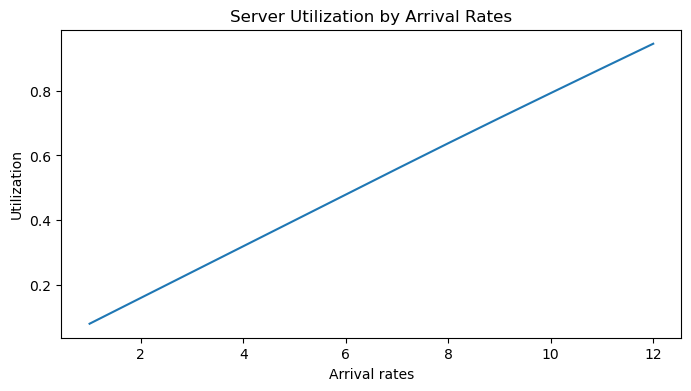

In [18]:
plt.figure(num=1, figsize=(8,4))
plt.plot(ar_rates, utilization)
plt.title('Server Utilization by Arrival Rates')
plt.xlabel("Arrival rates")
plt.ylabel("Utilization")
plt.show()

In [19]:
MAX_10 = max(dfs[-3]['complete-sent'])
MIN_10 = min(dfs[-3]['complete-sent'])
MEAN_10 = np.mean((dfs[-3]['complete-sent']))
SD_10 = np.std((dfs[-3]['complete-sent']))
print(f"For an arrival rate of 10,\nthe max response time is {MAX_10};\nthe min response time is {MIN_10};\
      \nthe mean response time is {MEAN_10};\nthe standard deviation is {SD_10}")

For an arrival rate of 10,
the max response time is 1.447595999998157;
the min response time is 0.00033400000029359944;      
the mean response time is 0.3288346560000064;
the standard deviation is 0.31432825011888427


In [22]:
MEANs = [np.mean((df['complete-sent'])) for df in dfs]
zipped = [x for x in zip(utilization, MEANs)]
print(zipped)

[(0.07990854200303942, 0.0869059960000377), (0.15978851574975828, 0.09569467599999189), (0.23963920026085142, 0.10479275199996482), (0.3194657248494175, 0.11509702000001562), (0.399276819875939, 0.12863635999995313), (0.47906471138070345, 0.14517568399994343), (0.5588362268081839, 0.1684361699999208), (0.6378679993547415, 0.1977681400000147), (0.7158230949952732, 0.25027485200004596), (0.7928351565990366, 0.3288346560000064), (0.8693743028659328, 0.4425892380000878), (0.9454279142970762, 0.8276834020000169)]


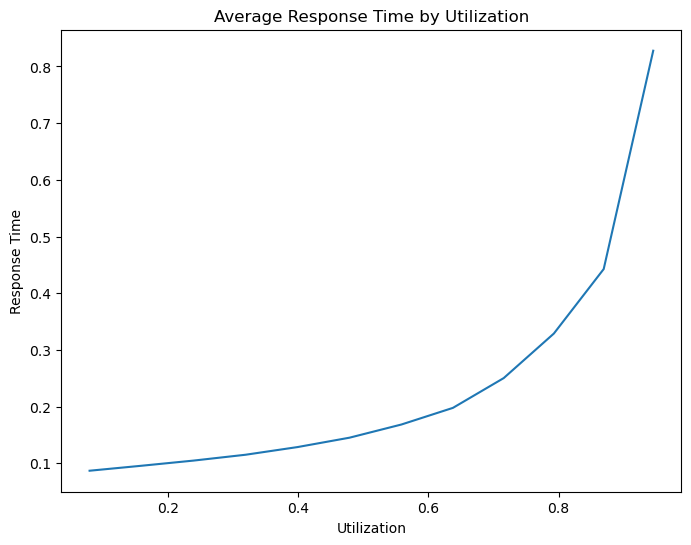

In [21]:
plt.figure(num=1, figsize=(8,6))
plt.plot(utilization, MEANs)
plt.title('Average Response Time by Utilization')
plt.xlabel("Utilization")
plt.ylabel("Response Time")
plt.show()